In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *

epochs = 20

In [3]:
accuracy_list = []

In [4]:
print(accuracy_list)

[]


In [5]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.1
learning_rate= 1e-4
wd=1e-2

num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [6]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_combined_train_test.csv', classes=['Suicide','Homicide'])


In [7]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained')


learn.freeze()

In [8]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


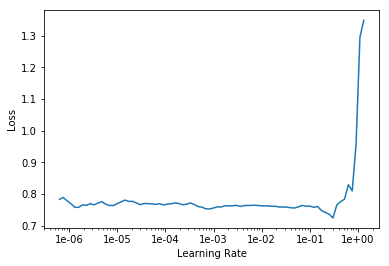

In [9]:
learn.recorder.plot()

In [10]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:28
epoch  train_loss  valid_loss  accuracy
1      0.715858    0.774971    0.386473  (00:07)
2      0.681856    0.839033    0.386473  (00:07)
3      0.653714    0.790749    0.458937  (00:07)
4      0.691991    0.799317    0.574879  (00:06)



In [11]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:02
epoch  train_loss  valid_loss  accuracy
1      0.676950    0.733571    0.439614  (00:16)
2      0.623763    0.711400    0.545894  (00:19)
3      0.612307    0.710929    0.545894  (00:18)
4      0.583920    0.708634    0.589372  (00:18)
5      0.571450    0.729924    0.628019  (00:19)
6      0.559883    0.697929    0.637681  (00:19)
7      0.546672    0.692233    0.647343  (00:18)
8      0.508597    0.658136    0.700483  (00:20)
9      0.494973    0.631710    0.666667  (00:19)
10     0.546375    0.568800    0.724638  (00:15)
11     0.490893    0.534293    0.772947  (00:18)
12     0.481618    0.565746    0.729469  (00:17)
13     0.462547    0.499769    0.792271  (00:18)
14     0.462639    0.542215    0.753623  (00:16)
15     0.396650    0.533255    0.768116  (00:20)
16     0.419964    0.472795    0.811594  (00:17)
17     0.428509    0.520035    0.772947  (00:16)
18     0.401663    0.463078    0.811594  (00:18)
19     0.434822    0.433212    0.859903  (00:15)
20     0.41

In [12]:
learn.validate()

[0.45215142, tensor(0.8213)]

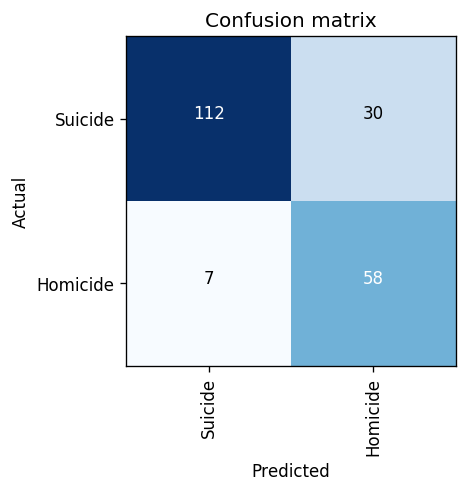

In [13]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

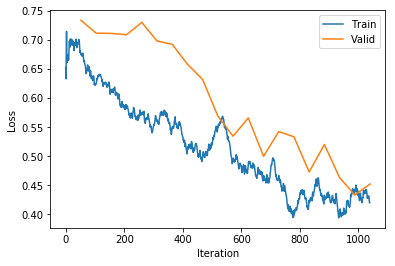

In [15]:
learn.recorder.plot_losses()

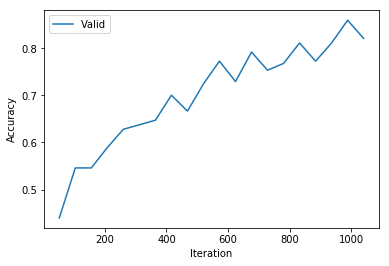

In [16]:
learn.recorder.plot_metrics()

In [17]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained')

learn.freeze()

In [18]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


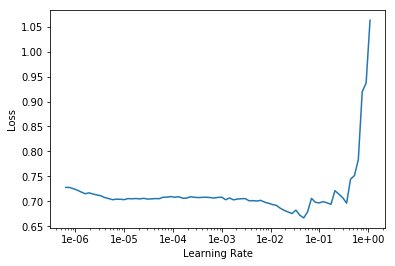

In [19]:
learn.recorder.plot()

In [20]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:26
epoch  train_loss  valid_loss  accuracy
1      0.682280    0.661336    0.632850  (00:06)
2      0.655809    0.675770    0.560386  (00:07)
3      0.660219    0.645747    0.623188  (00:06)
4      0.651887    0.636180    0.661836  (00:06)



In [21]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:03
epoch  train_loss  valid_loss  accuracy
1      0.601314    0.617716    0.657005  (00:19)
2      0.582173    0.568361    0.748792  (00:17)
3      0.588894    0.495708    0.816425  (00:20)
4      0.588249    0.531744    0.772947  (00:16)
5      0.545990    0.563086    0.772947  (00:20)
6      0.566557    0.458837    0.826087  (00:16)
7      0.545981    0.538598    0.763285  (00:16)
8      0.491842    0.425289    0.830918  (00:19)
9      0.522250    0.428479    0.821256  (00:16)
10     0.451774    0.411053    0.840580  (00:21)
11     0.464588    0.439899    0.821256  (00:18)
12     0.468734    0.390472    0.830918  (00:17)
13     0.456991    0.379086    0.859903  (00:19)
14     0.479995    0.390734    0.811594  (00:15)
15     0.440090    0.372145    0.855072  (00:17)
16     0.414932    0.451005    0.811594  (00:17)
17     0.397831    0.348527    0.859903  (00:18)
18     0.385277    0.377185    0.811594  (00:19)
19     0.332337    0.377608    0.864734  (00:20)
20     0.36

In [22]:
learn.validate()

[0.3684521, tensor(0.8309)]

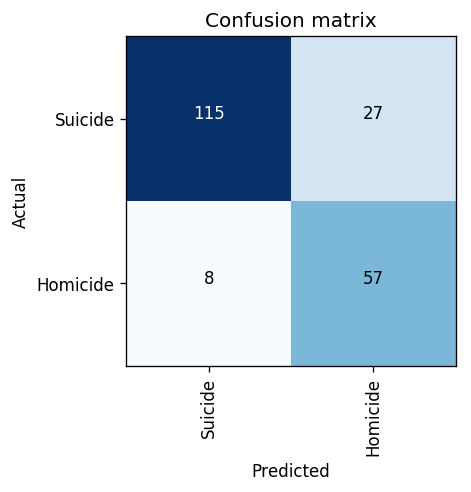

In [23]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

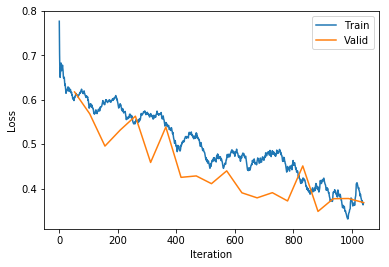

In [25]:
learn.recorder.plot_losses()

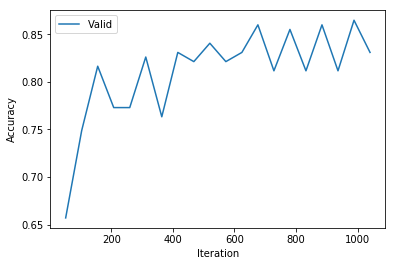

In [26]:
learn.recorder.plot_metrics()

In [27]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained')

learn.freeze()

In [28]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


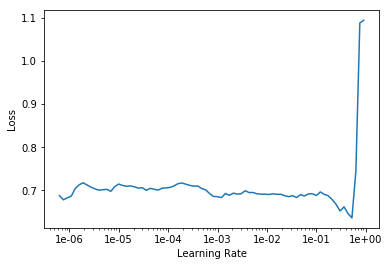

In [29]:
learn.recorder.plot()

In [30]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:27
epoch  train_loss  valid_loss  accuracy
1      0.673941    0.528700    0.806763  (00:06)
2      0.655159    0.479929    0.821256  (00:06)
3      0.621469    0.499500    0.811594  (00:07)
4      0.610059    0.527476    0.797101  (00:06)



In [31]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:04
epoch  train_loss  valid_loss  accuracy
1      0.615043    0.593548    0.734300  (00:15)
2      0.565424    0.583824    0.700483  (00:19)
3      0.586603    0.577438    0.729469  (00:16)
4      0.560667    0.527509    0.748792  (00:17)
5      0.549785    0.534905    0.758454  (00:17)
6      0.522942    0.503085    0.806763  (00:18)
7      0.502815    0.485388    0.792271  (00:18)
8      0.521204    0.453926    0.830918  (00:16)
9      0.511339    0.445539    0.826087  (00:18)
10     0.481449    0.423298    0.840580  (00:18)
11     0.456860    0.439588    0.792271  (00:17)
12     0.461462    0.450072    0.840580  (00:18)
13     0.419921    0.396256    0.840580  (00:19)
14     0.403939    0.389060    0.874396  (00:19)
15     0.379948    0.382840    0.864734  (00:18)
16     0.379128    0.355248    0.826087  (00:19)
17     0.424722    0.410989    0.845411  (00:15)
18     0.375933    0.358966    0.840580  (00:20)
19     0.340922    0.371969    0.869565  (00:19)
20     0.30

In [32]:
learn.validate()

[0.34657845, tensor(0.8696)]

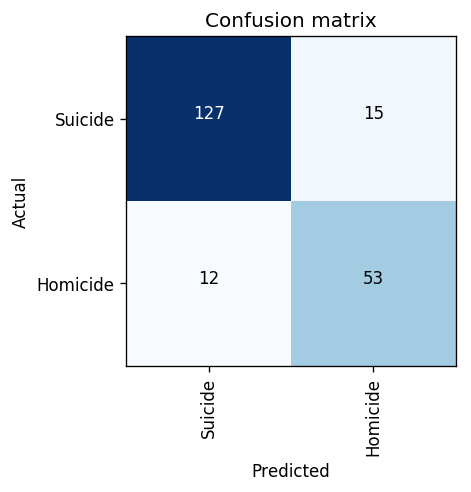

In [33]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

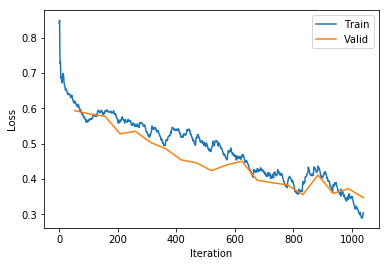

In [35]:
learn.recorder.plot_losses()

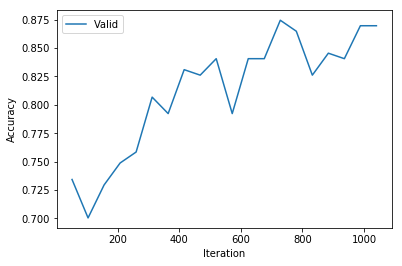

In [36]:
learn.recorder.plot_metrics()

In [37]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained')

learn.freeze()

In [38]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


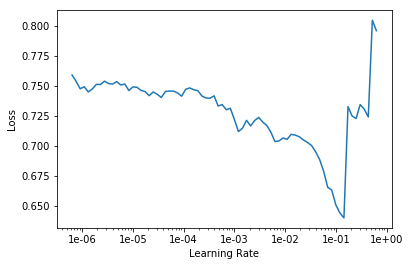

In [39]:
learn.recorder.plot()

In [40]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:27
epoch  train_loss  valid_loss  accuracy
1      0.677307    0.691363    0.526570  (00:07)
2      0.670534    0.673084    0.565217  (00:06)
3      0.684125    0.637140    0.642512  (00:06)
4      0.649754    0.613187    0.637681  (00:07)



In [41]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:04
epoch  train_loss  valid_loss  accuracy
1      0.663875    0.701155    0.652174  (00:15)
2      0.589114    0.710084    0.632850  (00:19)
3      0.619883    0.578843    0.739130  (00:15)
4      0.597673    0.634959    0.666667  (00:17)
5      0.593735    0.573474    0.724638  (00:15)
6      0.535927    0.572113    0.705314  (00:19)
7      0.539984    0.536558    0.719807  (00:17)
8      0.527734    0.487540    0.792271  (00:18)
9      0.506525    0.537966    0.734300  (00:18)
10     0.493893    0.448391    0.811594  (00:18)
11     0.459460    0.426558    0.806763  (00:20)
12     0.474059    0.397956    0.821256  (00:18)
13     0.462167    0.393267    0.816425  (00:18)
14     0.417547    0.457343    0.806763  (00:20)
15     0.439017    0.408560    0.840580  (00:17)
16     0.421637    0.384627    0.821256  (00:18)
17     0.370106    0.410698    0.830918  (00:19)
18     0.399997    0.400789    0.835749  (00:16)
19     0.389694    0.394830    0.835749  (00:16)
20     0.34

In [42]:
learn.validate()

[0.33471102, tensor(0.8599)]

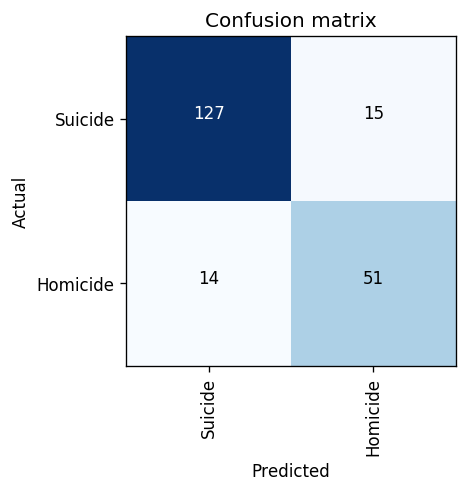

In [43]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

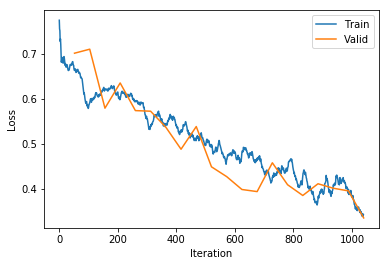

In [45]:
learn.recorder.plot_losses()

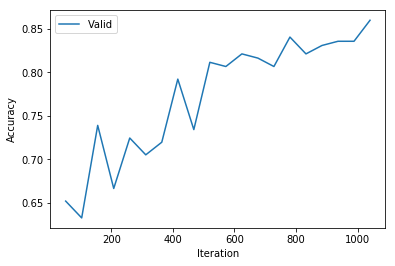

In [46]:
learn.recorder.plot_metrics()

In [47]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained')

learn.freeze()

In [48]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


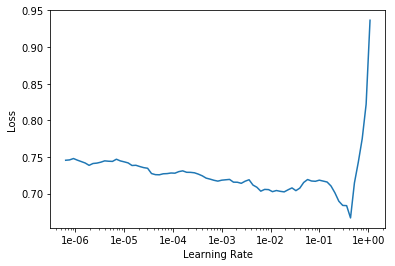

In [49]:
learn.recorder.plot()

In [50]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:26
epoch  train_loss  valid_loss  accuracy
1      0.700219    0.583418    0.777778  (00:06)
2      0.682770    0.565107    0.763285  (00:06)
3      0.636957    0.617458    0.671498  (00:07)
4      0.612955    0.599974    0.685990  (00:07)



In [51]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 05:52
epoch  train_loss  valid_loss  accuracy
1      0.637342    0.548687    0.763285  (00:17)
2      0.594253    0.622700    0.671498  (00:19)
3      0.572912    0.487142    0.758454  (00:19)
4      0.582844    0.547344    0.753623  (00:17)
5      0.573788    0.535636    0.748792  (00:19)
6      0.575412    0.505217    0.801932  (00:16)
7      0.580892    0.470208    0.792271  (00:15)
8      0.556369    0.463740    0.801932  (00:16)
9      0.545092    0.474515    0.816425  (00:17)
10     0.542279    0.437188    0.850242  (00:15)
11     0.530168    0.425468    0.826087  (00:15)
12     0.487814    0.446903    0.797101  (00:18)
13     0.465269    0.432096    0.821256  (00:19)
14     0.467659    0.375097    0.826087  (00:16)
15     0.412363    0.393782    0.835749  (00:19)
16     0.401685    0.378953    0.874396  (00:18)
17     0.407732    0.320271    0.874396  (00:17)
18     0.386588    0.366528    0.845411  (00:19)
19     0.389852    0.345794    0.869565  (00:17)
20     0.42

In [52]:
learn.validate()

[0.33258107, tensor(0.8841)]

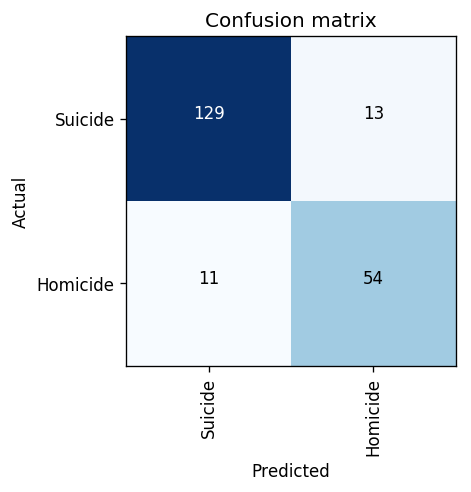

In [53]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

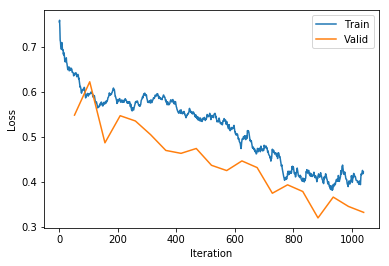

In [55]:
learn.recorder.plot_losses()

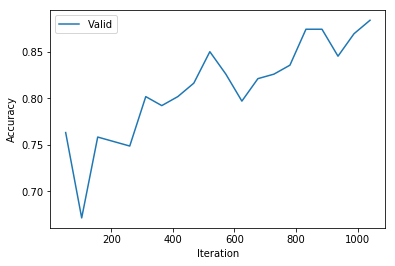

In [56]:
learn.recorder.plot_metrics()

In [57]:
print(accuracy_list)

[0.8212560415267944, 0.8212560415267944, 0.8309178948402405, 0.8309178948402405, 0.8695651888847351, 0.8695651888847351, 0.8599033951759338, 0.8599033951759338, 0.8840579986572266, 0.8840579986572266]


In [58]:
print(sum(accuracy_list)/len(accuracy_list))

0.8531401038169861


In [59]:
data_clas = TextClasDataBunch.from_csv(path_clas,'data_suicide_homicide_combined_train_test.csv', vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained')

learn.freeze()

In [60]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:33
epoch  train_loss  valid_loss  accuracy
1      0.696722    0.761895    0.436293  (00:08)
2      0.660433    0.741081    0.447876  (00:09)
3      0.674975    0.770623    0.416988  (00:08)
4      0.663015    0.757727    0.424710  (00:07)



In [61]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:08
epoch  train_loss  valid_loss  accuracy
1      0.573352    0.799184    0.463320  (00:24)
2      0.627929    0.634192    0.617761  (00:19)
3      0.618192    0.619499    0.640927  (00:21)
4      0.605431    0.527288    0.733591  (00:21)
5      0.568929    0.587936    0.656371  (00:24)
6      0.599832    0.519811    0.737452  (00:18)
7      0.563803    0.571191    0.714286  (00:21)
8      0.547269    0.480430    0.783784  (00:20)
9      0.537798    0.387466    0.830116  (00:20)
10     0.528292    0.421320    0.845560  (00:20)
11     0.497194    0.393837    0.864865  (00:20)
12     0.454594    0.344332    0.861004  (00:22)
13     0.452438    0.435913    0.833977  (00:21)
14     0.489725    0.349987    0.864865  (00:19)
15     0.422937    0.346659    0.876448  (00:24)
16     0.446429    0.419128    0.845560  (00:19)
17     0.468310    0.378047    0.857143  (00:18)
18     0.423881    0.378676    0.849421  (00:20)
19     0.352608    0.312387    0.899614  (00:24)
20     0.33

In [62]:
learn.validate()

[0.2518179, tensor(0.9151)]

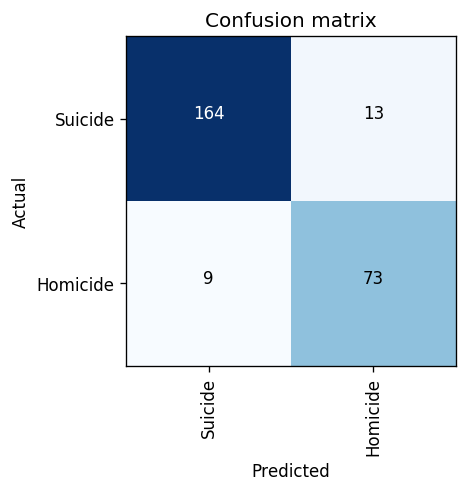

In [63]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [64]:
import torch

torch.cuda.empty_cache()